In [3]:
#!ls

In [4]:
#!unzip \*.zip && rm*.zip

In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Kaggle Dataset/Cotton Disease/train'
valid_path = '/content/drive/MyDrive/Kaggle Dataset/Cotton Disease/test'

In [7]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [8]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [9]:
#number of output classes is equal to number of folders/len of folders
folders = glob('/content/drive/MyDrive/Kaggle Dataset/Cotton Disease/train/*')

In [10]:
len(folders)

4

In [11]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Kaggle Dataset/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Kaggle Dataset/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 1515s 24s/step - loss: 1.2157 - accuracy: 0.5747 - val_loss: 0.3515 - val_accuracy: 0.8208
Epoch 2/20
61/61 [==============================] - 45s 740ms/step - loss: 0.2666 - accuracy: 0.8978 - val_loss: 0.3900 - val_accuracy: 0.8585
Epoch 3/20
61/61 [==============================] - 45s 739ms/step - loss: 0.2220 - accuracy: 0.9207 - val_loss: 0.1583 - val_accuracy: 0.9434
Epoch 4/20
61/61 [==============================] - 45s 738ms/step - loss: 0.1472 - accuracy: 0.9529 - val_loss: 0.1208 - val_accuracy: 0.9717
Epoch 5/20
61/61 [==============================] - 45s 744ms/step - loss: 0.1112 - accuracy: 0.9683 - val_loss: 0.2467 - val_accuracy: 0.9151
Epoch 6/20
61/61 [==============================] - 45s 742ms/step - loss: 0.1248 - accuracy: 0.9590 - val_loss: 0.1140 - val_accuracy: 0.9528
Epoch 7/20
61/61 [==============================] - 45s 743ms/step - loss: 0.1019 - accuracy: 0.9643 - val_loss: 0.1121 - val_accuracy: 0.9528

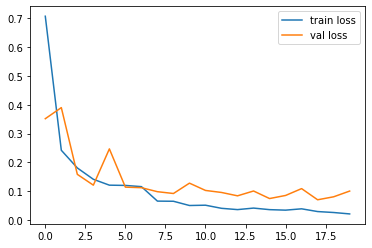

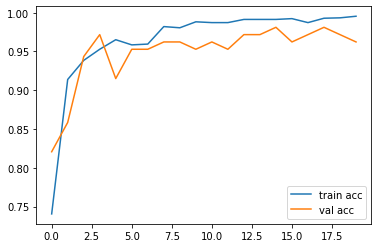

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
model.save('model_vgg16.h5')

Resnet50

In [21]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [22]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [23]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [24]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [26]:
# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [27]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 52s 781ms/step - loss: 4.3611 - accuracy: 0.3300 - val_loss: 1.3748 - val_accuracy: 0.5000
Epoch 2/20
61/61 [==============================] - 46s 746ms/step - loss: 1.2355 - accuracy: 0.5286 - val_loss: 1.1638 - val_accuracy: 0.5566
Epoch 3/20
61/61 [==============================] - 45s 744ms/step - loss: 1.0086 - accuracy: 0.5958 - val_loss: 1.5248 - val_accuracy: 0.5943
Epoch 4/20
61/61 [==============================] - 45s 735ms/step - loss: 0.8947 - accuracy: 0.6709 - val_loss: 1.2965 - val_accuracy: 0.4717
Epoch 5/20
61/61 [==============================] - 45s 730ms/step - loss: 1.0286 - accuracy: 0.5974 - val_loss: 0.9724 - val_accuracy: 0.6415
Epoch 6/20
61/61 [==============================] - 44s 729ms/step - loss: 0.7240 - accuracy: 0.6966 - val_loss: 0.9720 - val_accuracy: 0.6415
Epoch 7/20
61/61 [==============================] - 45s 732ms/step - loss: 0.7576 - accuracy: 0.7040 - val_loss: 0.9664 - val_accuracy: 0.5377

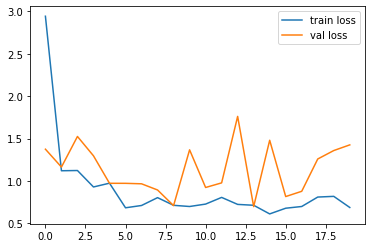

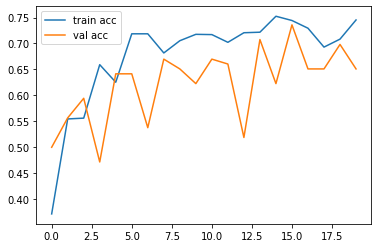

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
model.save('model_resnet50.h5')

In [34]:
import tensorflow
resnet152 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 4s 0us/step


In [35]:
# don't train existing weights
for layer in resnet152.layers:
    layer.trainable = False

In [36]:
# our layers - you can add more if you want
x = Flatten()(resnet152.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152.input, outputs=prediction)
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set), validation_steps=len(test_set)
)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 66s 906ms/step - loss: 1.8915 - accuracy: 0.7055 - val_loss: 0.9820 - val_accuracy: 0.8868
Epoch 2/20
61/61 [==============================] - 51s 830ms/step - loss: 0.4054 - accuracy: 0.9330 - val_loss: 0.9833 - val_accuracy: 0.9151
Epoch 3/20
61/61 [==============================] - 51s 830ms/step - loss: 0.3793 - accuracy: 0.9447 - val_loss: 0.6483 - val_accuracy: 0.9528
Epoch 4/20
61/61 [==============================] - 51s 825ms/step - loss: 0.3189 - accuracy: 0.9453 - val_loss: 0.2142 - val_accuracy: 0.9528
Epoch 5/20
61/61 [==============================] - 50s 823ms/step - loss: 0.3655 - accuracy: 0.9527 - val_loss: 0.4453 - val_accuracy: 0.9434
Epoch 6/20
61/61 [==============================] - 51s 831ms/step - loss: 0.2480 - accuracy: 0.9566 - val_loss: 0.0822 - val_accuracy: 0.9811
Epoch 7/20
61/61 [==============================] - 51s 826ms/step - loss: 0.1795 - accuracy: 0.9742 - val_loss: 0.6119 - val_accuracy: 0.9434

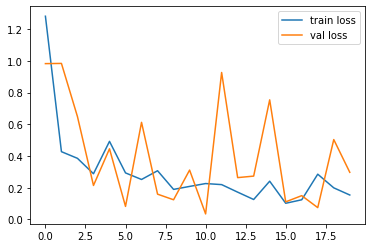

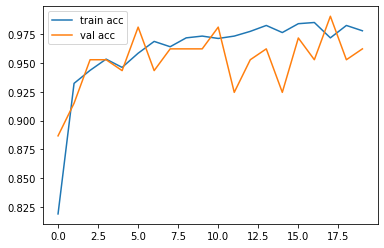

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
model.save('model_resnet152.h5')

In [39]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [40]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 2s 0us/step


In [42]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [43]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set), validation_steps=len(test_set)
)



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 53s 771ms/step - loss: 3.8119 - accuracy: 0.5942 - val_loss: 0.7115 - val_accuracy: 0.8491
Epoch 2/20
61/61 [==============================] - 42s 696ms/step - loss: 0.4461 - accuracy: 0.9107 - val_loss: 1.3931 - val_accuracy: 0.8585
Epoch 3/20
61/61 [==============================] - 43s 697ms/step - loss: 0.7207 - accuracy: 0.8721 - val_loss: 0.5031 - val_accuracy: 0.8774
Epoch 4/20
61/61 [==============================] - 42s 691ms/step - loss: 0.4924 - accuracy: 0.9241 - val_loss: 0.2638 - val_accuracy: 0.8962
Epoch 5/20
61/61 [==============================] - 42s 694ms/step - loss: 0.3926 - accuracy: 0.9366 - val_loss: 0.2197 - val_accuracy: 0.9151
Epoch 6/20
61/61 [==============================] - 42s 693ms/step - loss: 0.3871 - accuracy: 0.9378 - val_loss: 1.6683 - val_accuracy: 0.8019
Epoch 7/20
61/61 [==============================] - 42s 689ms/step - loss: 0.8088 - accuracy: 0.9186 - val_loss: 0.5678 - val_accuracy: 0.9151

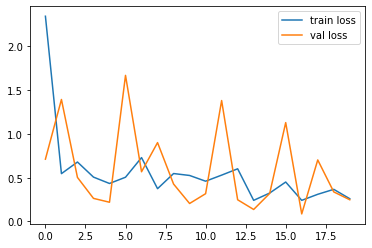

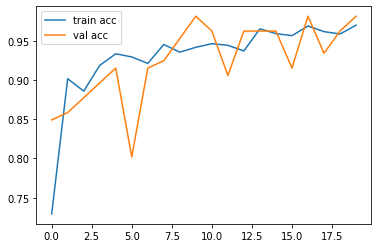

<Figure size 432x288 with 0 Axes>

In [44]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [45]:
model.save('model_inception.h5')